# 前期准备

In [1]:
# !apt install fonts-noto fonts-noto-cjk* fonts-droid-fallback

In [2]:
import pandas as pd
print('pandas:', pd.__version__)

import numpy as np
print('numpy:', np.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

import seaborn as sns
print('seaborn:', sns.__version__)

import pyecharts
print('pyecharts: {}'.format(pyecharts.__version__))

from pyecharts.globals import CurrentConfig, NotebookType
# CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.NOTEBOOK_TYPE = NotebookType.NTERACT


pandas: 1.4.2
numpy: 1.21.5
matplotlib: 3.5.1
seaborn: 0.11.2
pyecharts: 1.9.1


In [3]:
# %load -s matplotlib_cjk_font_setup lib.py
def matplotlib_cjk_font_setup():
    import subprocess

    mat_fonts = set(f.name for f in matplotlib.font_manager.FontManager().ttflist)

    output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
    output = output.decode('utf-8')
    # print '*' * 10, '系统可用的中文字体', '*' * 10
    # print output
    zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
    available = mat_fonts & zh_fonts

    print('*' * 10, '可用的字体', '*' * 10)
    for f in available:
        print(f)

    # 将中文字体放在备选字体首位

    # ********** 可用的字体 **********
    # AR PL UMing CN
    # Noto Sans CJK JP
    # AR PL UKai CN
    # Noto Serif CJK JP
    # Droid Sans Fallback

    fonts = matplotlib.rcParamsDefault['font.sans-serif'].copy()
    fonts.insert(0, 'Droid Sans Fallback')
    fonts.insert(0, 'Noto Sans CJK JP')
    matplotlib.rcParams['font.sans-serif'] = fonts
    print('<font.sans-serif>: ', matplotlib.rcParams['font.sans-serif'])

    fonts = matplotlib.rcParamsDefault['font.serif'].copy()
    fonts.insert(0, 'Droid Sans Fallback')
    fonts.insert(0, 'Noto Serif CJK JP')
    matplotlib.rcParams['font.serif'] = fonts
    print('<font.serif>: ', matplotlib.rcParams['font.serif'])

    fonts = matplotlib.rcParamsDefault['font.monospace'].copy()
    fonts.insert(0, 'Droid Sans Fallback')
    matplotlib.rcParams['font.monospace'] = fonts
    print('<font.monospace>: ', matplotlib.rcParams['font.monospace'])


In [4]:
matplotlib_cjk_font_setup()

********** 可用的字体 **********
<font.sans-serif>:  ['Noto Sans CJK JP', 'Droid Sans Fallback', 'DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
<font.serif>:  ['Noto Serif CJK JP', 'Droid Sans Fallback', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
<font.monospace>:  ['Droid Sans Fallback', 'DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [5]:
# matplotlib.rc('font', family='Noto Serif CJK JP')
# matplotlib.rc('font', family='Noto Sans CJK JP')
# matplotlib.rc('font', family='Droid Sans Fallback')

# 数据导入

In [6]:
from datetime import datetime, timedelta
one_day = timedelta(days=1)

In [7]:
# %load -r 17-57 analysis.py

meta = {
    "shanghai": {
        "name": "上海市",
        "name_pinyin": "shanghai",
        "file_daily": "../data/shanghai-daily.csv",
        "file_residents": "../data/shanghai-daily-residents.csv",
        "date_range": {"from": "2022-03-06", "to": "2022-06-01"},
        "districts": [
            "浦东新区", "徐汇区", "闵行区", "黄浦区", "嘉定区", "松江区", "虹口区", "长宁区",
            "青浦区", "静安区", "宝山区", "杨浦区", "普陀区", "崇明区", "金山区", "奉贤区"
        ],
        "events": [
            {"from": "2022-03-18", "title": "非重点区分批核算检测"},
            {"from": "2022-03-31", "title": "上海全域静态管理"},
            # {"from": "2022-04-07", "title": "指数上升趋势放缓"},
            # {"from": "2022-04-10", "to": "2022-04-17", "title": "平台期"},
            {"from": "2022-04-04", "title": "全员核酸检测"},
            {"from": "2022-04-09", "title": "全市抗原检测"},
            {"from": "2022-04-22", "title": "全员核酸检测"},
            {"from": "2022-04-26", "title": "全员核酸检测"},
        ]
    },
    "beijing": {
        "name": "北京市",
        "name_pinyin": "beijing",
        "file_daily": "../data/beijing-daily.csv",
        "file_residents": "../data/beijing-daily-residents.csv",
        "date_range": {"from": "2022-04-15", "to": "2022-06-01"},
        "districts": [
            "朝阳区", "东城区", "西城区", "海淀区", "房山区", "丰台区", "石景山区", "门头沟区",
           	"大兴区", "通州区", "顺义区", "昌平区", "怀柔区", "平谷区", "密云区", "延庆区",
        ],
        "events": [
            {"from": "2022-04-26", "title": "全员核酸检测"},
            {"from": "2022-05-01", "title": "全员核酸检测"},
        ]
    }
}



In [8]:
# %load -s load_data lib.py
def load_data(meta):
    df_daily = pd.read_csv(meta['file_daily'], dtype=int, converters={'来源': str},
                           parse_dates=['日期'], infer_datetime_format=True)
    df_residents = pd.read_csv(meta['file_residents'],
                               parse_dates=['日期'], infer_datetime_format=True)
    # 限定日期范围
    date_from, date_to = meta['date_range']['from'], meta['date_range']['to']
    df_daily = df_daily[df_daily['日期'].between(date_from, date_to)]
    df_residents = df_residents[df_residents['日期'].between(date_from, date_to)]
    # 确保顺序
    df_daily.sort_values(by='日期', ascending=True, inplace=True)
    df_residents.sort_values(by=['日期', '分型', '区', '居住地', '年龄'],
                             ascending=True, inplace=True)
    # 合成信息
    df_residents['地址'] = df_residents['市'] + \
        df_residents['区'] + \
        df_residents['居住地']
    df_residents['标签'] = np.where(df_residents['分型'].notna(),
                                  df_residents['地址'] + '\n' + df_residents['分型'] + '，' +
                                  df_residents['性别'] + '，' +
                                  df_residents['年龄'].astype(str) + '岁',
                                  df_residents['地址'])

    return df_daily, df_residents


In [9]:
import os
import pathlib

# city = 'beijing'
city = 'shanghai'
meta_city = meta[city]
df_daily, df_residents = load_data(meta=meta_city)

pathlib.Path(os.path.join(".", "figures", city)).mkdir(parents=True, exist_ok=True)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Both a converter and dtype were specified for column 来源 - only the converter will be used.
  return func(*args, **kwargs)
/var/folders/0y/w8_c2wb926d_lpxtpnnw5wxw0000gp/T/ipykernel_76272/1862451914.py:5: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_residents = pd.read_csv(meta['file_residents'],


In [10]:
df_daily.tail()

,日期,确诊病例,无症状感染者,轻型,普通型,重型,危重型,死亡,在院治疗,治愈出院,...,长宁区_无症状_来自风险人群,青浦区_无症状_来自风险人群,静安区_无症状_来自风险人群,宝山区_无症状_来自风险人群,杨浦区_无症状_来自风险人群,普陀区_无症状_来自风险人群,崇明区_无症状_来自风险人群,金山区_无症状_来自风险人群,奉贤区_无症状_来自风险人群,来源
4,2022-05-02,274,5396,0,0,488,88,20,13401,3982,...,6,0,2,12,0,0,1,0,2,https://wsjkw.sh.gov.cn/xwfb/20220503/a1722c75...
3,2022-05-03,263,4723,0,0,486,95,16,11779,1869,...,4,0,0,6,6,0,1,0,1,https://wsjkw.sh.gov.cn/xwfb/20220504/9f609ed5...
2,2022-05-04,263,4390,0,0,512,99,13,10290,1739,...,6,0,1,4,0,0,0,0,0,https://wsjkw.sh.gov.cn/xwfb/20220505/ee424731...
1,2022-05-05,245,4026,0,0,526,95,12,9133,1390,...,2,0,2,2,2,0,0,0,1,https://wsjkw.sh.gov.cn/xwfb/20220506/c6828146...
0,2022-05-06,253,3961,0,0,464,87,13,7709,1664,...,0,0,0,2,0,0,0,1,0,https://wsjkw.sh.gov.cn/xwfb/20220507/a3785869...


In [11]:
df_residents.tail()

,日期,病例号,分型,性别,年龄,市,区,居住地,经度,纬度,地址,标签
1524,2022-05-06,黄浦区黄河路277号,NaN,NaN,0,上海市,黄浦区,黄河路277号,121.464640,31.239126,上海市黄浦区黄河路277号,上海市黄浦区黄河路277号
1525,2022-05-06,黄浦区黄河路281弄,NaN,NaN,0,上海市,黄浦区,黄河路281弄,121.464567,31.239340,上海市黄浦区黄河路281弄,上海市黄浦区黄河路281弄
1526,2022-05-06,黄浦区黄河路288号,NaN,NaN,0,上海市,黄浦区,黄河路288号,121.464843,31.239394,上海市黄浦区黄河路288号,上海市黄浦区黄河路288号
1527,2022-05-06,黄浦区龙华东路18号,NaN,NaN,0,上海市,黄浦区,龙华东路18号,121.488584,31.197972,上海市黄浦区龙华东路18号,上海市黄浦区龙华东路18号
1528,2022-05-06,黄浦区龙华东路888弄,NaN,NaN,0,上海市,黄浦区,龙华东路888弄,121.466689,31.195026,上海市黄浦区龙华东路888弄,上海市黄浦区龙华东路888弄


# 绘图

In [12]:
import os
import pathlib

file_dir = os.path.abspath('')
base_dir = os.path.join(file_dir, "figures", meta_city['name_pinyin'])
print(base_dir)
pathlib.Path(base_dir).mkdir(parents=True, exist_ok=True)


/Users/tao/lab/covid/analysis/figures/shanghai


## 总体疫情趋势

In [13]:
# %load -s plot_stacked_bar lib.py
def plot_stacked_bar(indexes, data, labels, colors, paddings=[], ax=None):
    # 画 堆叠bar 图
    base = 0
    for i, d in enumerate(data):
        bar = ax.bar(x=indexes, height=d, label=labels[i],
            clip_on=True,
            width=1,
            color=colors[i],
            edgecolor='w',
            linewidth=2,
            alpha=1,
            bottom=base,
            )
        if len(paddings) > 0:
            padding = paddings[i]
        else:
            padding = 0
        # ax.bar_label(bar, d.astype('int32'), rotation=90, padding=-max(d)*0.002, color='w', fontsize=15, weight='bold')
        ax.bar_label(bar, d.astype('int32'), rotation=90, padding=padding, color='w', fontsize=15, weight='bold')
        base = d + base


In [14]:
# %load -s plot_adjacent_bar lib.py
def plot_adjacent_bar(indexes, data, labels, colors, paddings=[], ax=None):
    # 画 相邻bar 图
    bar_width = 0.9/len(data)
    for i, d in enumerate(data):
        bar_shift = (i*bar_width) * one_day
        bar = ax.bar(x=indexes+bar_shift, height=d, label=labels[i],
                     clip_on=True,
                     width=bar_width,
                     color=colors[i],
                     edgecolor='w',
                     linewidth=0.2,
                     alpha=0.8,
                     )
        if len(paddings) > 0:
            padding = paddings[i]
        else:
            padding = 0
        ax.bar_label(bar, d.astype('int32'), rotation=90,
                     padding=padding, color='w', fontsize=15, weight='bold')


In [15]:
# %load -s plot_aux_line lib
def plot_aux_line(events=[], ax=None):
    # 计算最高位
    position_top = ax.get_ylim()[1] * 0.99

    # 显示事件标注的辅助线
    for e in events:
        if 'to' in e and e['to']:
            # range
            ax.axvspan(
                datetime.fromisoformat(e['from']) - one_day/2,
                datetime.fromisoformat(e['to']) - one_day/2,
                color='grey', alpha=0.4,
                )

            ax.text(
                datetime.fromisoformat(e['from']) + one_day*4,
                position_top,
                e['title'],
                rotation=0,
                horizontalalignment='right',
                verticalalignment='top',
                multialignment='center',
                size=17,
                color='grey',
                alpha=0.6
                )
        else:
            # line
            ax.text(
                datetime.fromisoformat(e['from']) - one_day/1.8,
                position_top,
                e['title'],
                rotation=90,
                horizontalalignment='right',
                verticalalignment='top',
                multialignment='center',
                size=17,
                # color='darkblue',
                color='grey',
                alpha=0.6
                )
            ax.axvline(
                datetime.fromisoformat(e['from']) - one_day/2,
                0,position_top,
                # linestyle='-', linewidth=3, color='red', alpha=0.3,
                linestyle='-', linewidth=3, color='grey', alpha=0.3,
                )


In [16]:
# %load -s draw_positive lib
def draw_positive(title, date, confirmed, asymptomatic, events=[], colors=None, paddings=None, show_legend=False, show_minor_label=False, ax=None):
    ax.grid(True, which='major', alpha=0.3)

    if colors is None:
        colors = [
            matplotlib.cm.Reds(matplotlib.colors.LogNorm()(confirmed)),
            matplotlib.cm.Wistia(matplotlib.colors.Normalize()(asymptomatic)),
        ]
    
    if paddings is None:
        paddings = [8, -40]

    # 画 bar 图
    plot_stacked_bar(
        indexes=date,
        data=[confirmed, asymptomatic],
        labels=['确诊病例', '无症状感染者'],
        colors=colors,
        paddings=paddings,
        ax=ax,
    )

    # 显示图例
    if show_legend:
        ax.legend(ncol = 2, loc = 'lower left', borderaxespad=4, fontsize=15)
        # # debug legend
        # leg = ax.get_legend()
        # print('legend color: {}: {}, {}: {}.'.format(
        #     0, leg.legendHandles[0].get_label(),
        #     1, leg.legendHandles[1],
        # ))

    # 显示事件标注的辅助线
    plot_aux_line(events=events, ax=ax)

    # 计算最高位
    position_top = ax.get_ylim()[1]

    # 标题
    t =  "更新至 {} ({})\n(新增 {:.0f} 确诊病例，新增 {:.0f} 无症状感染者)".format(date.max().strftime('%Y年%m月%d日'), title, confirmed.iloc[-1], asymptomatic.iloc[-1])
    ax.text(
        x=date.min() + one_day, y=position_top * 0.97,
        s=t,
        rotation=0,
        horizontalalignment='left',
        verticalalignment='top',
        multialignment='center',
        size='20',
        fontweight='bold',
        color='black',
        alpha=1
        )
    
    # 🎉 庆祝清零（渲染背景色稍微不同）
    if confirmed.iloc[-1] + asymptomatic.iloc[-1] == 0:
        ax.patch.set_facecolor('lavender')
        ax.patch.set_alpha(0.5)


    # X 轴日期格式调整
    ax.tick_params('x', which='both', labelrotation=90)
    # major
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m月%d日'))
    if show_minor_label:
        # minor
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
        ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m月%d日'))

    ax.set_xlim([date.min(), date.max() + one_day*4/5])


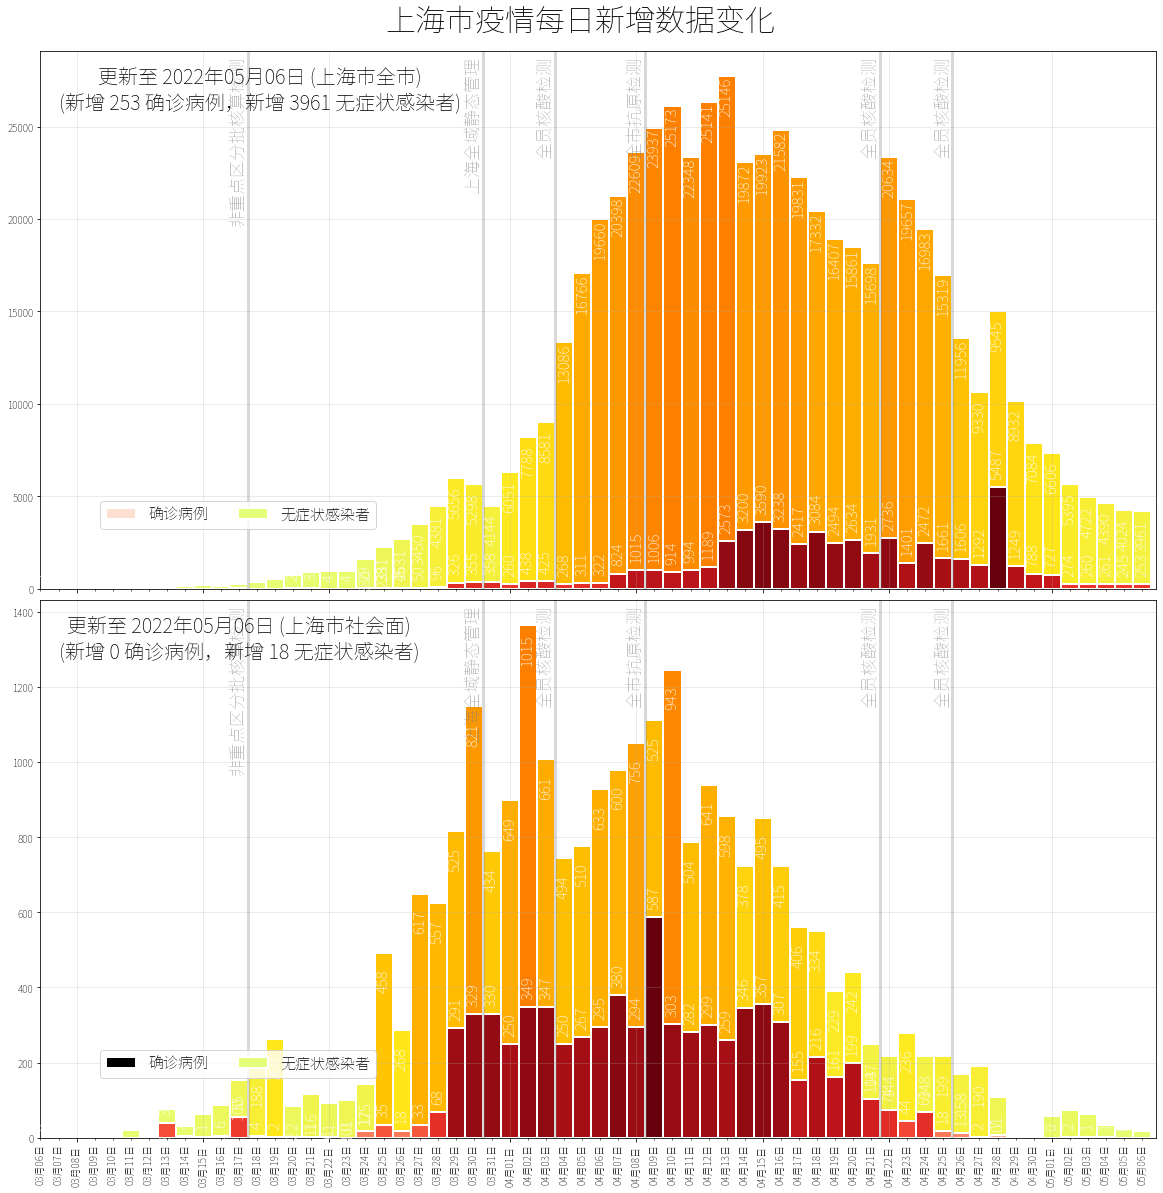

In [17]:
if max(df_daily['从风险人群中发现的本土病例']) > 0:
    fig, axes = plt.subplots(2, 1, figsize=(20, 20), sharex=True)

    name = meta_city['name']
    events = meta_city['events']

    plt.suptitle('{}疫情每日新增数据变化'.format(name),
                 y=0.90, fontsize=30, fontweight='bold', va='center')

    draw_positive('{}全市'.format(name), df_daily['日期'], df_daily['本土确诊病例'], df_daily['本土无症状感染者'],
                 events=events, show_legend=True, show_minor_label=True, ax=axes[0])
    draw_positive('{}社会面'.format(name), df_daily['日期'], df_daily['从风险人群中发现的本土病例'], df_daily['从风险人群中发现的无症状感染者'],
                 events=events, show_legend=True, show_minor_label=True, ax=axes[1])

    plt.subplots_adjust(wspace=0.02, hspace=0.02)
    plt.savefig(os.path.join(base_dir, 'daily_overall.png'), bbox_inches='tight')
    plt.show()
else:
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
    name = meta_city['name']
    events = meta_city['events']

    plt.suptitle('{}疫情每日新增数据变化'.format(name),
                 y=0.90, fontsize=30, fontweight='bold', va='center')

    draw_positive('{}全市'.format(name), df_daily['日期'], df_daily['本土确诊病例'], df_daily['本土无症状感染者'],
                 events=events, colors=['brown', 'orange'], paddings=[-20, -15], show_legend=True, show_minor_label=True, ax=ax)

    # plt.subplots_adjust(wspace=0.02, hspace=0.02)
    plt.savefig(os.path.join(base_dir, 'daily_overall.png'), bbox_inches='tight')
    plt.show()


In [18]:
# %load -s draw_type lib
def draw_type(title, date, asymptomatic, mild, normal, severe, critical, death, events=[], colors=None, paddings=None, show_minor_label=True, ax=None):
    ax.grid(True, which='major', alpha=0.3)

    if colors is None:
        colors = ['grey', 'brown', 'darkorange',
                  'orangered', 'orange', 'gold']
    if paddings is None:
        paddings = [-10, -10, -10, -20, -20, -15]

    plot_stacked_bar(
        indexes=date,
        data=[death, critical, severe, normal, mild, asymptomatic],
        labels=['死亡', '危重型', '重型', '普通型', '轻型', '无症状感染者'],
        colors=colors,
        paddings=paddings,
        ax=ax,
    )

    # 显示事件标注的辅助线
    plot_aux_line(events=events, ax=ax)

    # 调整X坐标标签
    ax.tick_params('x', which='both', labelrotation=90)
    # major
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m月%d日'))
    if show_minor_label:
        # minor
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
        ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m月%d日'))

    # 计算最高位
    position_top = ax.get_ylim()[1]

    t = "更新至 {} ({})\n(今日无症状感染者 {:.0f} 例，轻型 {:.0f} 例，普通型 {:.0f} 例，\n重症 {:.0f} 例，危重症 {:.0f} 例，死亡 {:.0f} 例)".format(
        date.max().strftime('%Y年%m月%d日'), title,
        asymptomatic.iloc[-1], mild.iloc[-1], normal.iloc[-1],
        severe.iloc[-1], critical.iloc[-1], death.iloc[-1])
    ax.text(
        x=date.min() + one_day, y=position_top * 0.98,
        s=t,
        rotation=0,
        horizontalalignment='left',
        verticalalignment='top',
        multialignment='center',
        size='20',
        fontweight='bold',
        color='black',
        alpha=1
    )

    ax.legend(ncol=2, loc='lower left', borderaxespad=4, fontsize=15)
    ax.set_ylim(bottom=0)


In [19]:
if max(df_daily['轻型']) > 0 and max(df_daily['本土确诊病例']) > 0:
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
    draw_type('疫情分型分析', df_daily['日期'],
              df_daily['本土无症状感染者'],
              df_daily['轻型'],
              df_daily['普通型'],
              df_daily['重型'],
              df_daily['危重型'],
              df_daily['本土死亡病例'],
              events=meta_city['events'],
              ax=ax)
    plt.subplots_adjust(wspace=0.02, hspace=0.03)
    plt.savefig(os.path.join(base_dir, 'daily_type_analysis.png'), bbox_inches='tight')
    plt.show()


In [20]:
# %load -s draw_critical lib
def draw_critical(title, date, severe, critical, death, show_minor_label=True, ax=None):
    ax.grid(True, which='major', alpha=0.3)
    
    plot_stacked_bar(
        indexes=date,
        data=[death, critical, severe],
        labels=['死亡','危重症','重症'],
        colors=[
            # matplotlib.cm.Greys(matplotlib.colors.LogNorm()(death)),
            # matplotlib.cm.Reds(matplotlib.colors.LogNorm()(critical)),
            # matplotlib.cm.Wistia(matplotlib.colors.Normalize()(severe)),
            'grey',
            'brown',
            'darkorange',
        ],
        paddings=[8, 8, -30],
        ax=ax,
    )

    # 计算最高位
    position_top = ax.get_ylim()[1] * 0.97

    # 调整X坐标标签
    ax.tick_params('x', which='both', labelrotation=90)
    # major
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m月%d日'))
    if show_minor_label:
        # minor
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
        ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m月%d日'))
    
    t =  "更新至 {} ({})\n(今日 重症 {:.0f} 例，危重症 {:.0f} 例，死亡 {:.0f} 例)".format(date.max().strftime('%Y年%m月%d日'), title, severe.iloc[-1], critical.iloc[-1], death.iloc[-1])
    ax.text(
        x=date.min() + one_day, y=position_top,
        s=t,
        rotation=0,
        horizontalalignment='left',
        verticalalignment='top',
        multialignment='center',
        size='20',
        fontweight='bold',
        color='black',
        alpha=1
        )

    ax.legend(ncol = 3, loc = 'lower left', borderaxespad=4, fontsize=15)
    ax.set_ylim(bottom=0)


In [21]:
# %load -s draw_hospital lib.py
def draw_hospital(title, date, positive, in_hospital, discharged_from_hospital, discharged_from_observation, show_minor_label=True, ax=None):
    ax.grid(True, which='major', alpha=0.3)

    # plot_adjacent_bar(
    #     indexes=date,
    #     data=[positive, in_hospital, discharged_from_hospital, discharged_from_observation],
    #     labels=['阳性病例', '在院治疗', '治愈出院', '解除医学观察'],
    #     colors=[
    #         # matplotlib.cm.Greys(matplotlib.colors.LogNorm()(death)),
    #         # matplotlib.cm.Reds(matplotlib.colors.LogNorm()(critical)),
    #         # matplotlib.cm.Wistia(matplotlib.colors.Normalize()(severe)),
    #         'darkorange',
    #         'brown',
    #         'darkgreen',
    #         'green',
    #     ],
    #     paddings=[8, 8, 8, -30],
    #     ax=ax,
    # )
    plot_adjacent_bar(
        indexes=date,
        data=[positive, in_hospital, discharged_from_hospital + discharged_from_observation],
        labels=['阳性病例', '在院治疗', '治愈出院+解除医学观察'],
        colors=[
            # matplotlib.cm.Greys(matplotlib.colors.LogNorm()(death)),
            # matplotlib.cm.Reds(matplotlib.colors.LogNorm()(critical)),
            # matplotlib.cm.Wistia(matplotlib.colors.Normalize()(severe)),
            'darkorange',
            'brown',
            'darkgreen',
        ],
        paddings=[8, 8, 8],
        ax=ax,
    )

    # 计算最高位
    position_top = ax.get_ylim()[1] * 0.97

    # 调整X坐标标签
    ax.tick_params('x', which='both', labelrotation=90)
    # major
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m月%d日'))
    if show_minor_label:
        # minor
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
        ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m月%d日'))

    # 标题
    t = "更新至 {} ({})\n(今日阳性病例{:.0f}例，在院治疗{:.0f}例，治愈出院{:.0f}例，解除医学观察{:.0f}例)".format(date.max().strftime(
        '%Y年%m月%d日'), title, positive.iloc[-1], in_hospital.iloc[-1], discharged_from_hospital.iloc[-1], discharged_from_observation.iloc[-1])
    ax.text(
        x=date.min() + one_day, y=position_top,
        s=t,
        rotation=0,
        horizontalalignment='left',
        verticalalignment='top',
        multialignment='center',
        size='20',
        fontweight='bold',
        color='black',
        alpha=1
    )

    # 图例
    ax.legend(ncol=4, loc='center left', borderaxespad=4, fontsize=15)
    ax.set_ylim(bottom=0)


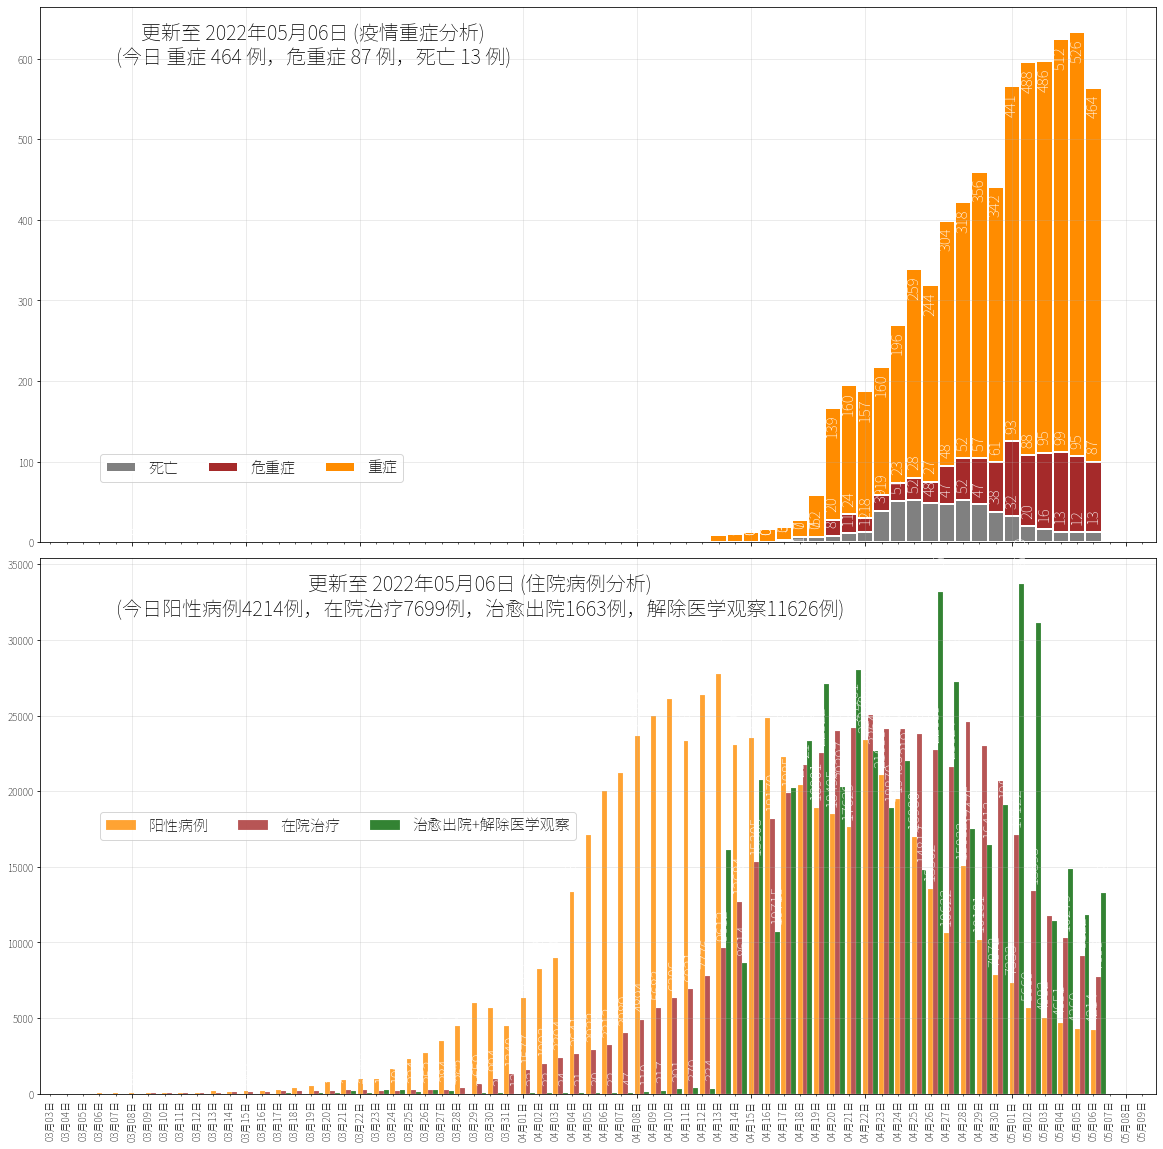

In [22]:
if max(df_daily['重型']) > 0 and max(df_daily['本土确诊病例']) > 0:
    fig, axes = plt.subplots(2, 1, figsize=(20, 20), sharex=True)
    draw_critical('疫情重症分析', df_daily['日期'], df_daily['重型'],
                  df_daily['危重型'], df_daily['本土死亡病例'], ax=axes[0])
    draw_hospital('住院病例分析', df_daily['日期'], df_daily['本土确诊病例']+df_daily['本土无症状感染者'],
                  df_daily['本土在院治疗'], df_daily['本土病例出院'], df_daily['解除医学观察'], ax=axes[1])
    plt.subplots_adjust(wspace=0.02, hspace=0.03)
    plt.savefig(os.path.join(base_dir, "daily_severe_analysis.png"), bbox_inches='tight')
    plt.show()


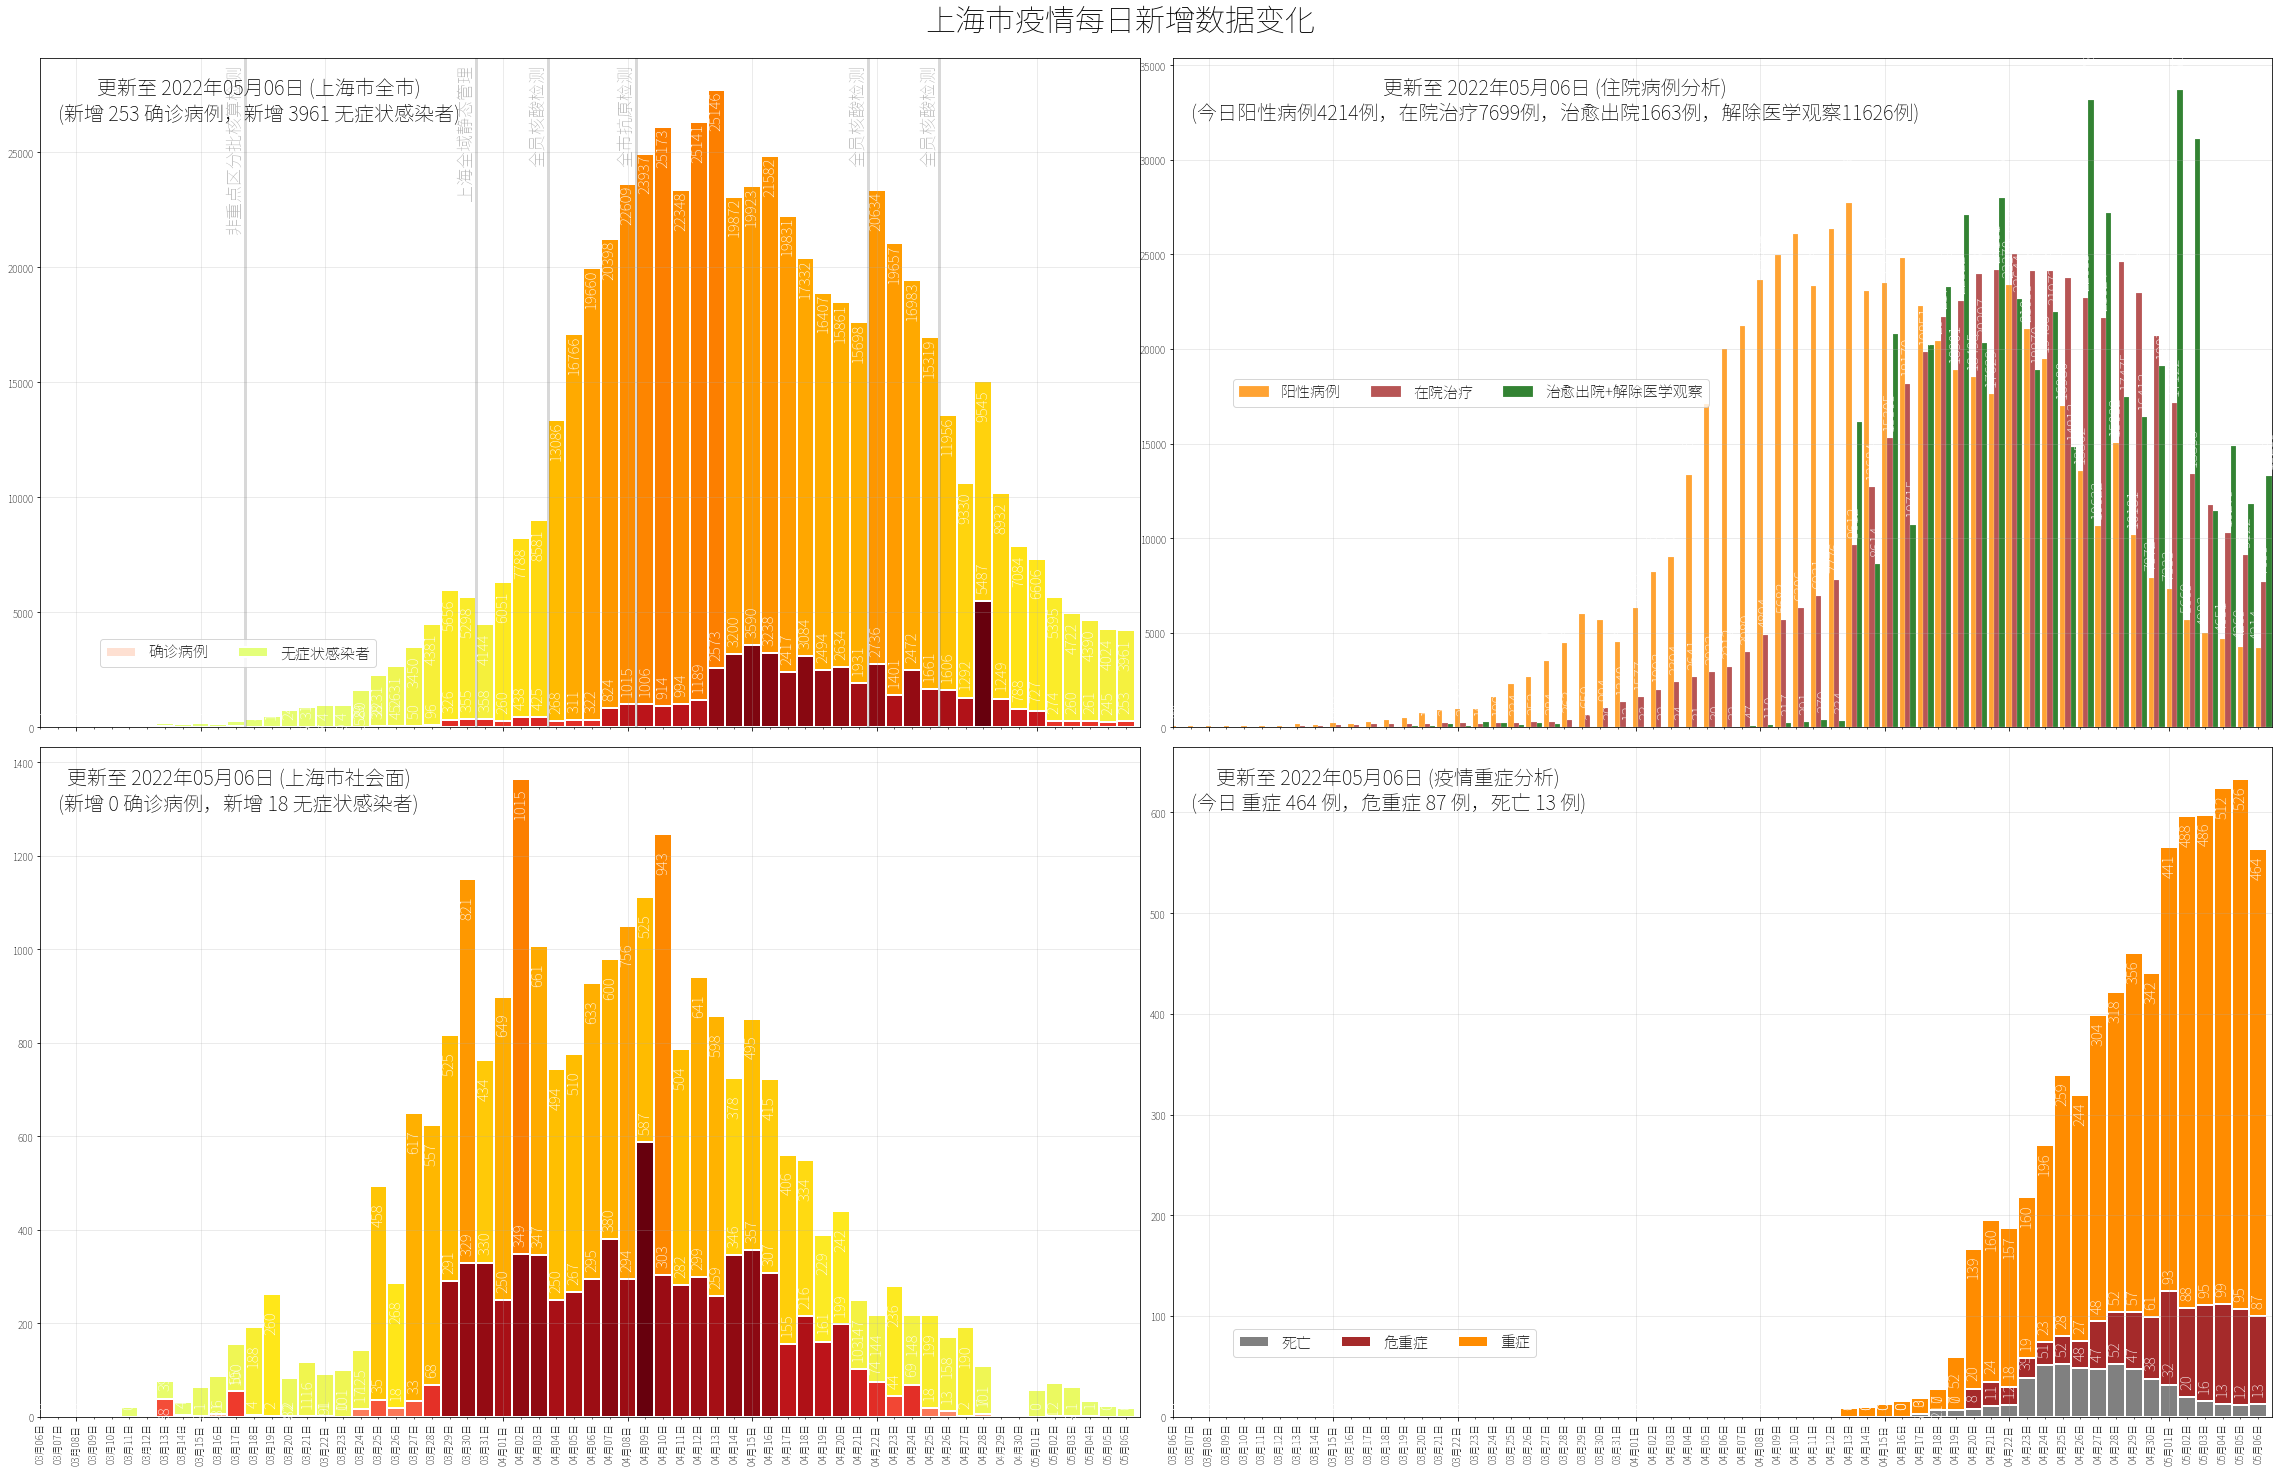

In [23]:
if max(df_daily['从风险人群中发现的本土病例']) > 0 and max(df_daily['重型']) > 0 and max(df_daily['本土确诊病例']) > 0:
    fig, axes = plt.subplots(2, 2, figsize = (40,25), sharex=True)

    plt.suptitle('{}疫情每日新增数据变化'.format(meta_city['name']), y=0.90, fontsize=30, fontweight='bold', va='center')

    draw_positive('{}全市'.format(meta_city['name']), df_daily['日期'], df_daily['本土确诊病例'], df_daily['本土无症状感染者'], events=meta_city['events'], show_legend=True, show_minor_label=True, ax=axes[0,0])
    draw_positive('{}社会面'.format(meta_city['name']), df_daily['日期'], df_daily['从风险人群中发现的本土病例'], df_daily['从风险人群中发现的无症状感染者'], show_minor_label=True, ax=axes[1,0])

    draw_hospital('住院病例分析', df_daily['日期'], df_daily['本土确诊病例']+df_daily['本土无症状感染者'], df_daily['本土在院治疗'], df_daily['本土病例出院'], df_daily['解除医学观察'], ax=axes[0,1])
    draw_critical('疫情重症分析', df_daily['日期'], df_daily['重型'], df_daily['危重型'], df_daily['本土死亡病例'], ax=axes[1,1])

    plt.subplots_adjust(wspace=0.03, hspace=0.03)

    plt.savefig(os.path.join(base_dir, "daily_overall_analysis.png"), bbox_inches='tight')

    plt.show()

## 分区确诊和无症状

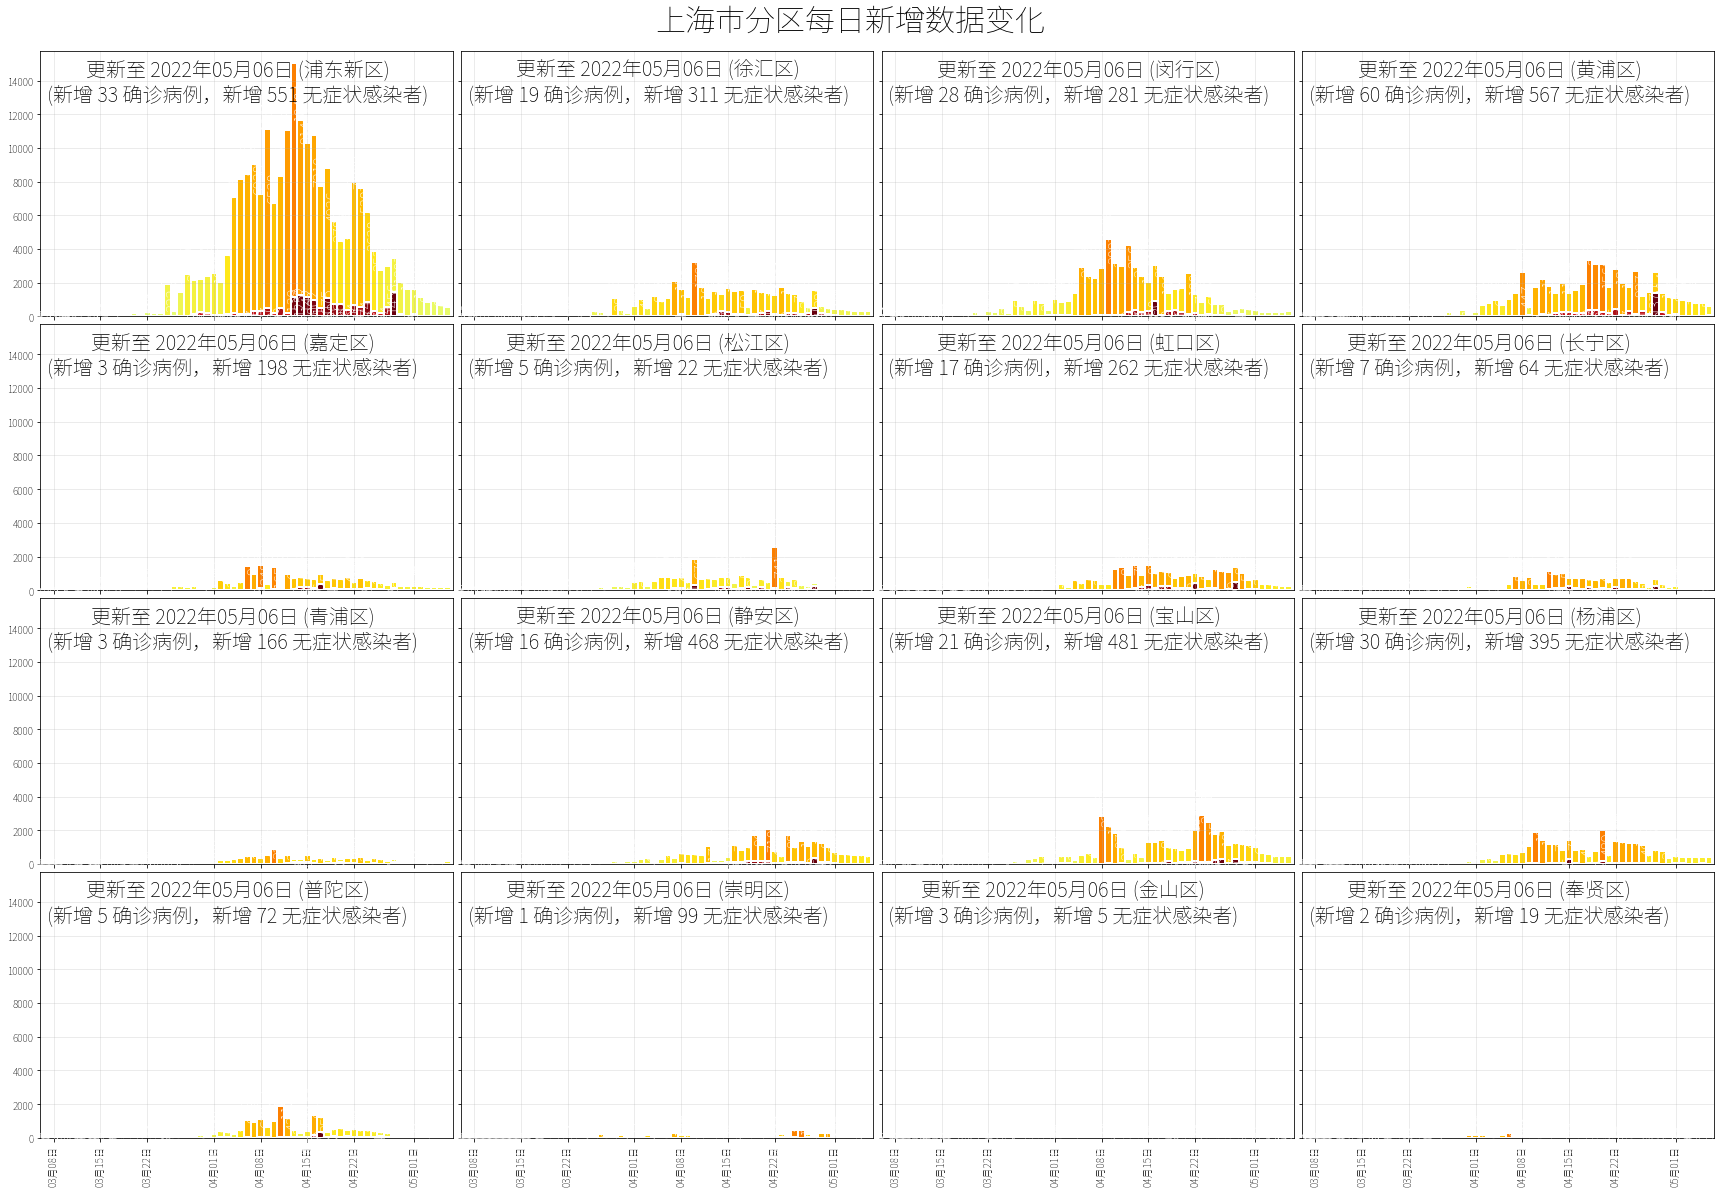

In [24]:
import math

if len(meta_city['districts']) > 0:
    nrows = math.ceil(len(meta_city['districts']) / 4)
    fig, axes = plt.subplots(nrows, 4, figsize = (30,20), sharex=True, sharey=True)
    plt.suptitle('{}分区每日新增数据变化'.format(meta_city['name']), y=0.90, fontsize=30, fontweight='bold', va='center')
    for i, d in enumerate(meta_city['districts']):
        draw_positive(d, df_daily['日期'], df_daily['{}_确诊'.format(d)], df_daily['{}_无症状'.format(d)],
            # events=meta_city['events'],
            paddings=[-20, 0],
            show_minor_label=False, ax=axes[int(i/4), i%4])

    plt.subplots_adjust(wspace=0.02, hspace=0.03)
    plt.savefig(os.path.join(base_dir, 'daily_district_positive.png'), bbox_inches='tight')
    plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


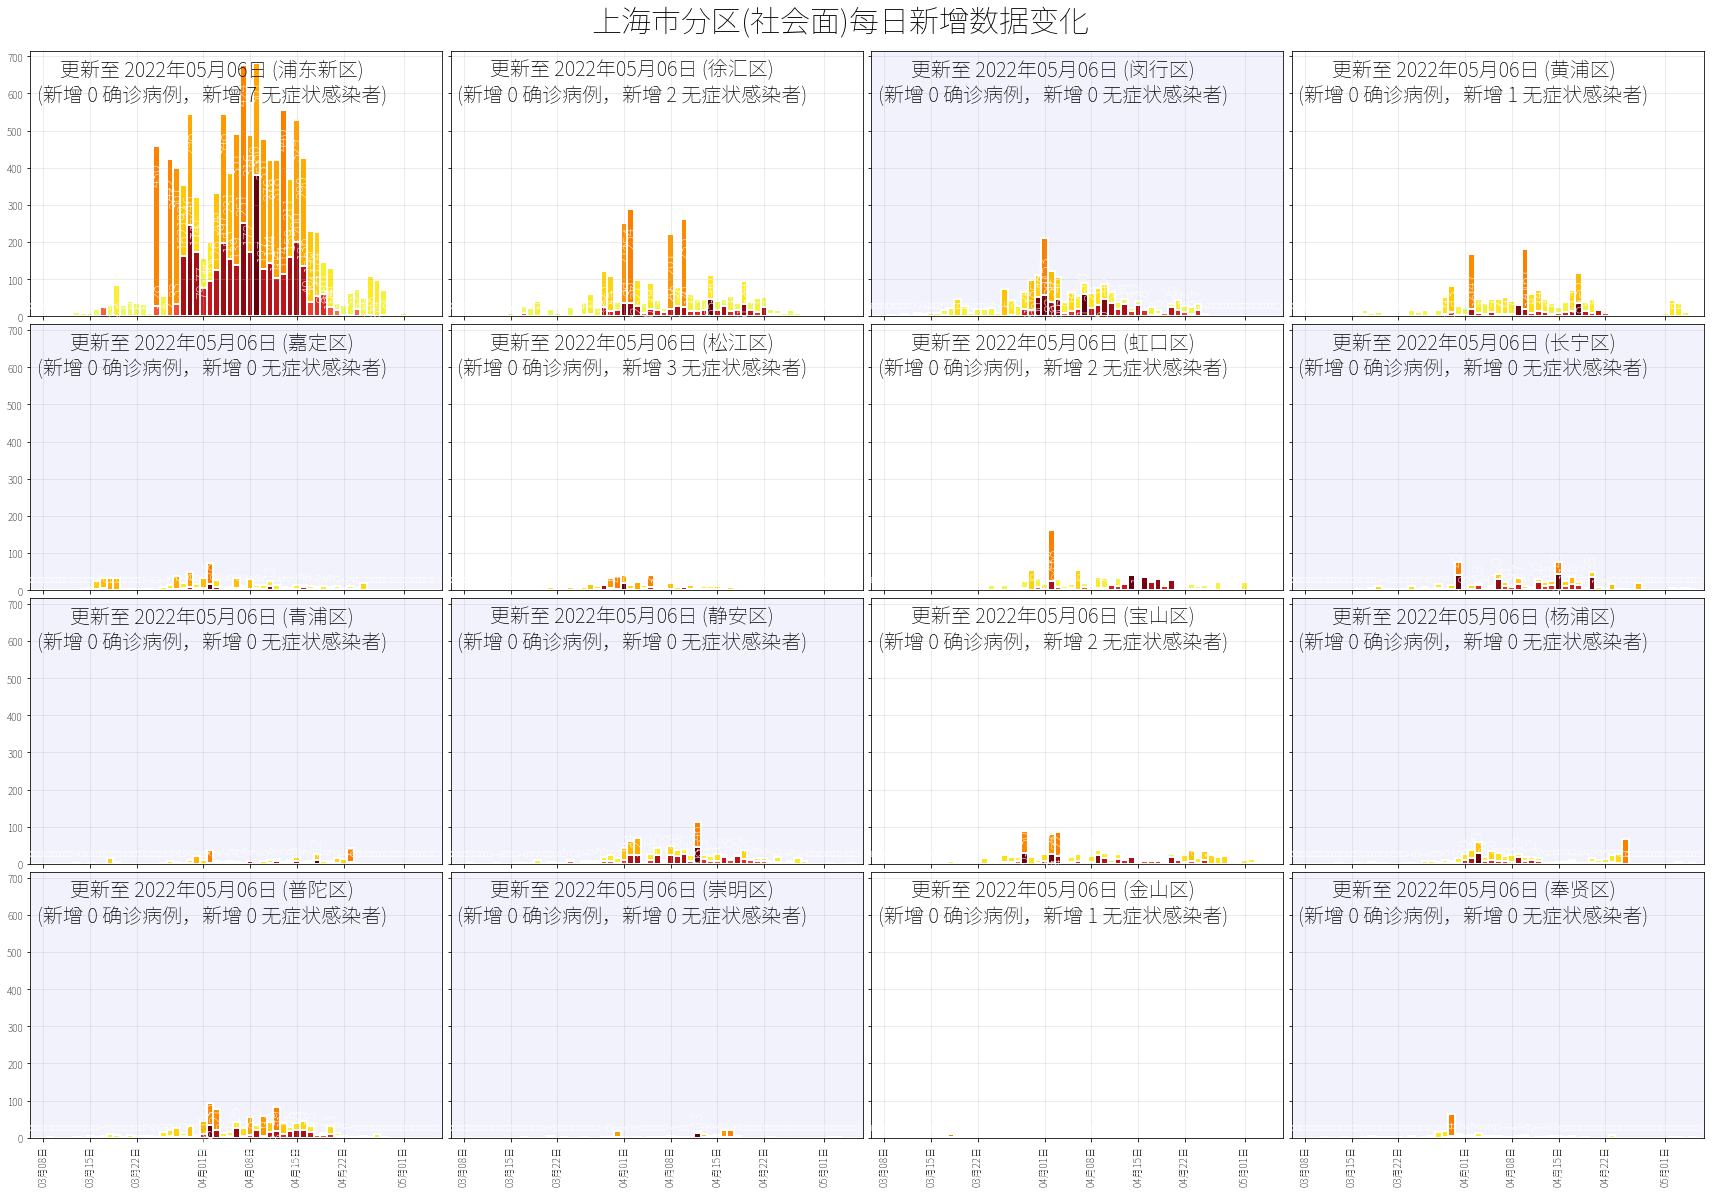

In [25]:
import math

if len(meta_city['districts']) > 0 and max(np.max(df_daily[['{}_确诊_来自风险人群'.format(d) for d in meta_city['districts']]])) > 0:
    nrows = math.ceil(len(meta_city['districts']) / 4)
    fig, axes = plt.subplots(nrows, 4, figsize = (30,20), sharex=True, sharey=True)
    plt.suptitle('{}分区(社会面)每日新增数据变化'.format(meta_city['name']), y=0.90, fontsize=30, fontweight='bold', va='center')
    for i, d in enumerate(meta_city['districts']):
        draw_positive(d, df_daily['日期'], df_daily['{}_确诊_来自风险人群'.format(d)], df_daily['{}_无症状_来自风险人群'.format(d)], show_minor_label=False, ax=axes[int(i/4), i%4])

    plt.subplots_adjust(wspace=0.02, hspace=0.03)
    plt.savefig(os.path.join(base_dir, 'daily_district_community.png'), bbox_inches='tight')

    plt.show()

## 地图

In [26]:
# map_data = df.iloc[-1]

In [27]:
# from pyecharts import options as opts
# from pyecharts.charts import Geo

# p = Geo()
# p.add_schema(maptype='上海', is_roam=False)
# p.add('本土确诊病例', list(map(lambda d: [d, map_data['{}_确诊'.format(d)]], districts)), type_='effectScatter')
# p.load_javascript()

In [28]:
# p.render_notebook()

In [29]:
# p = Map(init_opts=opts.InitOpts(width='1200px', height='1500px'))

# data = list(map(lambda d: map_data['{}_确诊'.format(d)].tolist(), districts))
# p.add('本土确诊病例', [list(z) for z in zip(districts, data)], "上海", is_roam=False)
# data_max1 = max(data)

# data = list(map(lambda d: map_data['{}_无症状'.format(d)].tolist(), districts))
# p.add('本土无症状感染者', [list(z) for z in zip(districts, data)], "上海", is_roam=False)
# data_max2 = max(data)

# p.set_global_opts(
#     title_opts=opts.TitleOpts(title="上海（确诊病例）"),
#     visualmap_opts=opts.VisualMapOpts(
#         min_=0,
#         max_=data_max1+data_max2,
#         # range_color=["yellow", "orangered"],
#         # is_piecewise=True,
#     ),
# )

# p.load_javascript()

In [30]:
# p.render_notebook()

In [31]:
# p = Map(init_opts=opts.InitOpts(width='1200px', height='1500px'))

# data = list(map(lambda d: map_data['{}_确诊_来自风险人群'.format(d)].tolist(), districts))
# p.add('本土确诊病例', [list(z) for z in zip(districts, data)], "上海", is_roam=False)
# data_max1 = max(data)

# data = list(map(lambda d: map_data['{}_无症状_来自风险人群'.format(d)].tolist(), districts))
# p.add('本土无症状感染者', [list(z) for z in zip(districts, data)], "上海", is_roam=False)
# data_max2 = max(data)

# p.set_global_opts(
#     title_opts=opts.TitleOpts(title="上海（社会面）"),
#     visualmap_opts=opts.VisualMapOpts(
#         min_=0,
#         max_=data_max1 + data_max2,
#         # range_color=["yellow", "orangered"],
#         # is_piecewise=True,
#     ),
# )

# p.load_javascript()

In [32]:
# p.render_notebook()

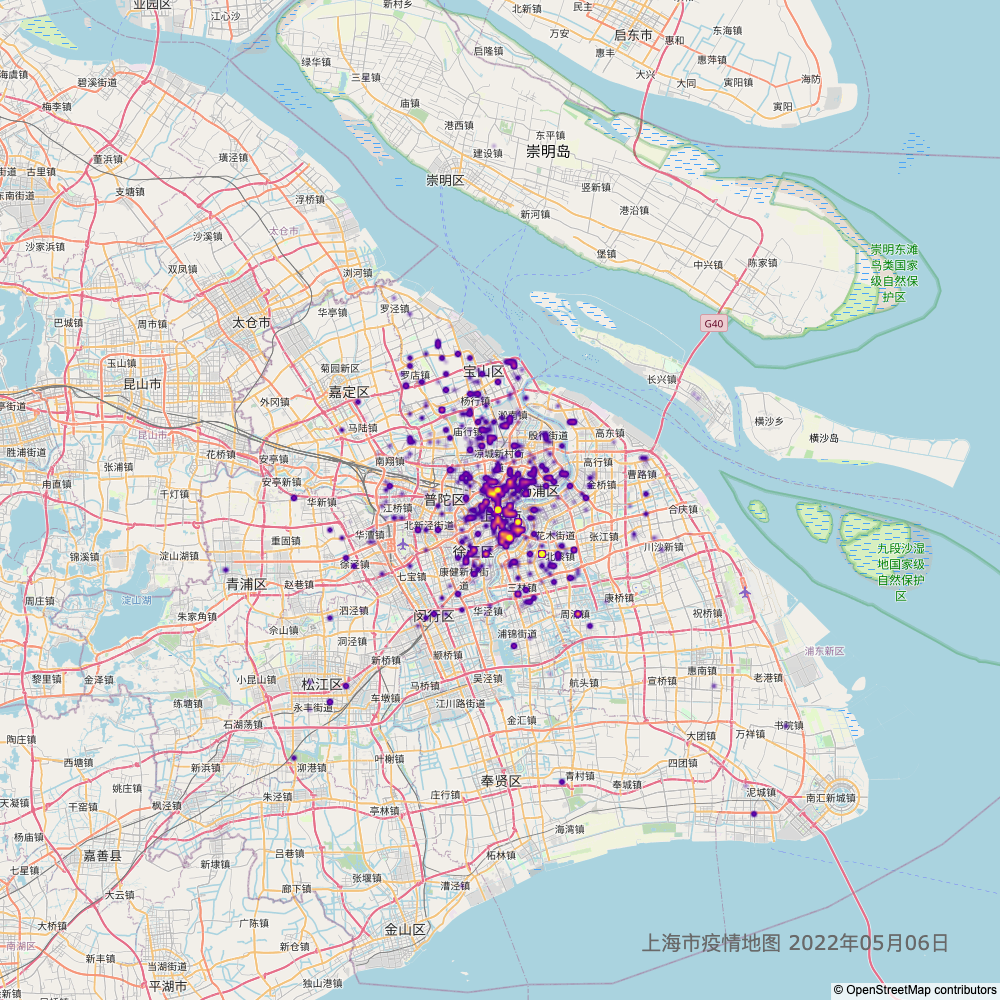

In [33]:
import plotly.express as px
from IPython.display import Image

latest_date = max(df_residents['日期'])
df_residents_latest = df_residents[df_residents['日期'] == latest_date]
fig = px.density_mapbox(df_residents_latest, lat='纬度', lon='经度', labels='标签',
                        radius=2, zoom=9, width=1000, height=1000,
                        # animation_frame='日期',
                        mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_traces(showlegend=False, showscale=False)
fig.update_coloraxes(showscale=False)
fig.update_layout(dragmode=False)
# fig.update_layout(title='', title_x=0.5)
title = '{}疫情地图 {}'.format(meta_city['name'], latest_date.strftime('%Y年%m月%d日'))
fig.update_layout(title=title, title_font_color='dimgrey',
                  title_font_size=20, title_x=0.95, title_y=0.05, title_yanchor='bottom', title_yref='paper')
# for i, frame in enumerate(fig.frames):
#     frame.layout.title = '上海疫情地图 {}'.format(frame.name)
# fig.write_image('./figures/{}/map_shanghai.png'.format(meta_city['name_pinyin']))

# fig.show(config= dict(displayModeBar = False))
Image(fig.to_image(format="png"))


In [34]:
import plotly.express as px
fig = px.density_mapbox(df_residents, lat='纬度', lon='经度', labels='标签',
                        radius=3, zoom=9, width=1000, height=1000,
                        animation_frame='日期',
                        mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_traces(showlegend=False, showscale=False)
fig.update_coloraxes(showscale=False)
fig.update_layout(dragmode=False)
# fig.update_layout(title='', title_x=0.5)
fig.update_layout(title='上海疫情地图 {}'.format(min(df_residents['日期'])),
                  title_font_color='dimgrey',
                  title_font_size=20,
                  title_x=0.95,
                  title_y=0.05,
                  title_yanchor='bottom',
                  title_yref='paper')
for i, frame in enumerate(fig.frames):
    frame.layout.title = '上海疫情地图 {}'.format(frame.name)
# fig.write_image('fig_map_shanghai.png')
fig.show(config=dict(displayModeBar=False))


KeyError: Timestamp('2022-03-06 00:00:00')